In [3]:
#todo put this in an enum to use
Run = 1
Walk  = 2
Hike  = 3
Ride  = 4
Swim  = 5
Workout  = 6
VirtualRide  = 7
AlpineSki  = 8

import pandas as pd
with pd.HDFStore('streams.h5','r') as store:
    df = store.select('streams',columns=['time','distance','velocity_smooth','heartrate','id'],where=['type==1'])
#get rid of times greater than 24 hours...or 86400 seconds
df = df[df['time'] < 86400]

In [3]:
df.head()

,time,distance,velocity_smooth,heartrate,id
0,0,0.000000,0.0,61.0,100401452
1,1,0.000746,1.2,61.0,100401452
7,7,0.014232,3.3,61.0,100401452
12,12,0.021939,3.1,61.0,100401452
16,16,0.031386,3.1,61.0,100401452


<IPython.core.display.Javascript object>


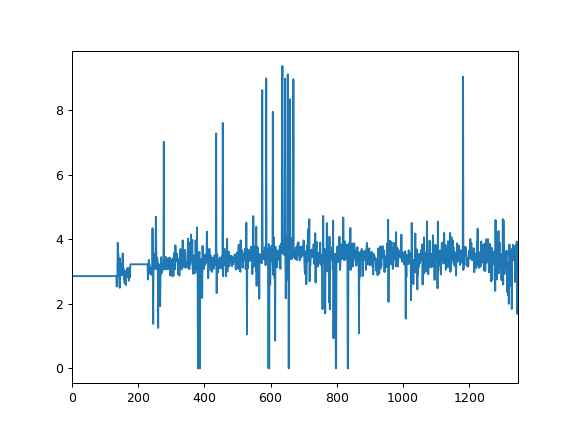

In [7]:
%matplotlib notebook
temp = df.groupby('id')['velocity_smooth'].apply(pd.np.mean)
temp.index = pd.np.arange(1, len(temp)+1)
temp.plot()

# General Activity Viz

In [12]:
import pandas as pd
act_df = pd.read_csv('activities.csv')

## Kudos Viz

<IPython.core.display.Javascript object>


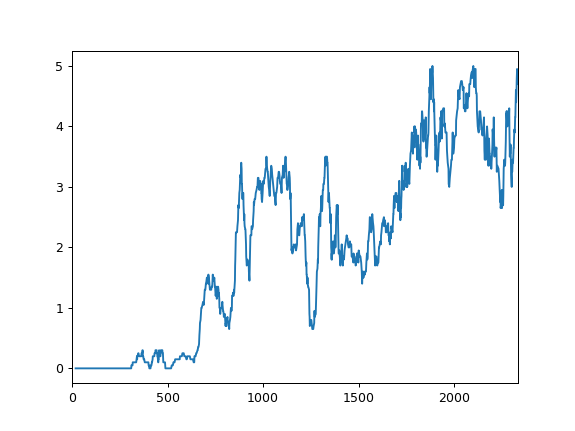

In [68]:
%matplotlib notebook
act_df[act_df['type']=='Run'].kudos_count.rolling(20).mean().plot()

In [57]:
temp_df = act_df[act_df['type']=='Run']
temp_df = temp_df[temp_df.kudos_count>0]
temp_df['pace'] = 1/(temp_df.average_speed.str.replace(' m / s', '').astype(float)*0.0372823)
temp_df = temp_df[temp_df.pace < 10]

<IPython.core.display.Javascript object>


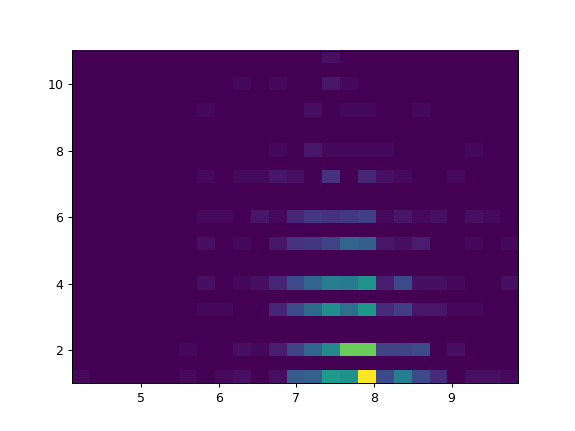

In [59]:
%matplotlib notebook
import matplotlib.pyplot as plt
#pace[pd.np.isnan(pace)]
blah = matplotlib.pyplot.hist2d(temp_df.pace.values, temp_df.kudos_count.astype(float),bins=25)

In [56]:
temp_df.pace.corr(temp_df.kudos_count)

-0.13468281958858364

# Heartrate Viz

In [60]:
temp_df = act_df[act_df['type']=='Run']
temp_df = temp_df[pd.notnull(temp_df.average_heartrate)]
temp_df['pace'] = 1/(temp_df.average_speed.str.replace(' m / s', '').astype(float)*0.0372823)
temp_df = temp_df[temp_df.pace < 10]

<IPython.core.display.Javascript object>


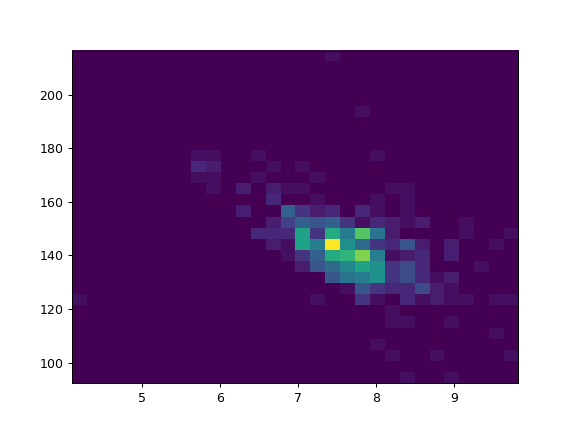

In [69]:
%matplotlib notebook
import matplotlib.pyplot as plt
#pace[pd.np.isnan(pace)]
blah = matplotlib.pyplot.hist2d(temp_df.pace.values, temp_df.average_heartrate.astype(float),bins=30)

In [62]:
temp_df.pace.corr(temp_df.average_heartrate)

-0.54323364707559518

# Try this in Seaborn

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
%matplotlib notebook
g = sns.pairplot(df[['distance','velocity_smooth','time']].dropna(), kind="reg",dropna=True)

<IPython.core.display.Javascript object>